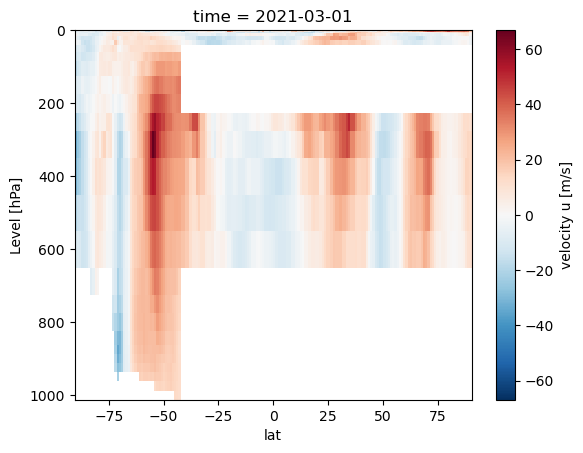

In [3]:
#
# plot vertical cross-section of zonal windspeed using ZL5 dataset
#
import xarray as xr
import healpy as hp

# open Zarr with xarray
zd = xr.open_zarr("/large/sftpgo/data/NICAM/hackathon/healpix/NICAM_3d6h_z6.zarr")
zd

nt = zd.ua.shape[0]
ua = zd.ua.isel(time=nt-1) # zonal windspeed
ua

import numpy as np
import xarray as xr

lats = np.linspace(-90.0, 90.0, 180)
lons = np.full_like(lats, 0.0)

nside = zd.healpix.healpix_nside
flg_nested = zd.healpix.healpix_order == "nested"

pnts = xr.DataArray(
    hp.ang2pix(nside, lons, lats, lonlat=True, nest=flg_nested),
    dims=("cell",),
    coords={"lon": (("cell",), lons), "lat": (("cell",), lats)},
)

ua.isel(cell=pnts).swap_dims({"cell": "lat"}).plot(x="lat", yincrease=False)


In [3]:
nt = zd.ua.shape[0]
ua = zd.ua.isel(time=nt-1) # zonal windspeed
ua

<xarray.DataArray 'ua' (lev: 25, cell: 49152)> Size: 5MB
dask.array<getitem, shape=(25, 49152), dtype=float32, chunksize=(5, 49152), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 200B 1e+03 975.0 950.0 925.0 ... 20.0 10.0 5.0 1.0
    time     datetime64[ns] 8B 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:  healpix
    long_name:     velocity u
    units:         m/s

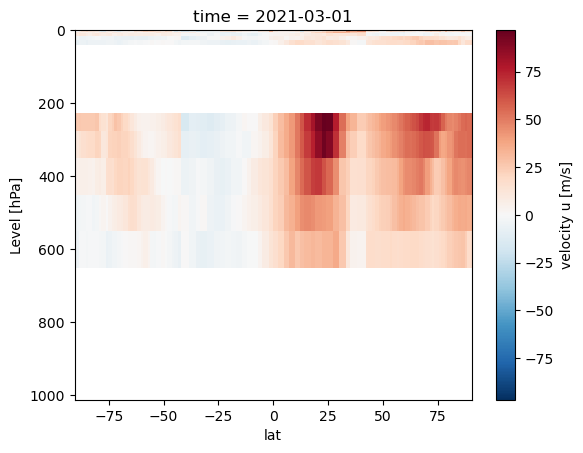

In [8]:
import numpy as np
import xarray as xr

# lons = np.linspace(-90.0, 90.0, 200)
# lats = np.full_like(lons, 0.0)
lats = np.linspace(-90.0, 90.0, 180)
lons = np.full_like(lats, 0.0)

nside = zd.healpix.healpix_nside
flg_nested = zd.healpix.healpix_order == "nested"

pnts = xr.DataArray(
    hp.ang2pix(nside, lons, lats, lonlat=True, nest=flg_nested),
    dims=("cell",),
    coords={"lon": (("cell",), lons), "lat": (("cell",), lats)},
)
#pnts
#ua.isel(cell=pnts)
ua.isel(cell=pnts).swap_dims({"cell": "lat"}).plot(x="lat", yincrease=False)
#ua.plot(x="cell")
# ua.isel(cell=pnts).swap_dims({"cell": "lon"}).plot(x="lon", yincrease=False)
# ua.isel(cell=pnts).swap_dims({"cell": "lon"}).plot(x="lon", yincrease=False)
#ua.swap_dims({"cell": "lon"})
#ua.swap_dims({"cell": "lon"}).plot(x="lon", yincrease=False)
# ds = model_run(zoom=7).to_dask()

# pnts = xr.DataArray(
#     healpy.ang2pix(get_nside(ds), lons, lats, lonlat=True, nest=get_nest(ds)),
#     dims=("cell",),
#     coords={"lon": (("cell",), lons), "lat": (("cell",), lats)},
# )

# ds.v.isel(time=0, cell=pnts).swap_dims({"cell": "lon"}).plot(x="lon", yincrease=False)

In [5]:
import easygems.healpix as egh

ModuleNotFoundError: No module named 'easygems'